In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
member = "mri-esm2-0_r1i1p1f1"
data_ssp126 = xr.open_dataset(f"/home/ostronet/kurser/see110/sim_outputs/output_ssp126_{member}",engine="netcdf4")
data_ssp370 = xr.open_dataset(f"/home/ostronet/kurser/see110/sim_outputs/output_ssp370_{member}",engine="netcdf4")
data_ssp585 = xr.open_dataset(f"/home/ostronet/kurser/see110/sim_outputs/output_ssp585_{member}",engine="netcdf4")

In [3]:
fnsize_title = 16
fnsize_label = 14

In [4]:
members = ["gfdl-esm4_r1i1p1f1", "mri-esm2-0_r1i1p1f1", "ipsl-cm6a-lr_r1i1p1f1", "ukesm1-0-ll_r1i1p1f2", "mpi-esm1-2-hr_r1i1p1f1"]

In [5]:
print(data_ssp126["melt_on_glacier_monthly"])

<xarray.DataArray 'melt_on_glacier_monthly' (time: 122, month_2d: 12,
                                             rgi_id: 266)> Size: 2MB
[389424 values with dtype=float32]
Coordinates:
  * time               (time) float64 976B 1.98e+03 1.981e+03 ... 2.101e+03
  * rgi_id             (rgi_id) <U14 15kB 'RGI60-08.00005' ... 'RGI60-08.03302'
    hydro_year         (time) int64 976B ...
    hydro_month        (time) int64 976B ...
    calendar_year      (time) int64 976B ...
    calendar_month     (time) int64 976B ...
  * month_2d           (month_2d) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
    calendar_month_2d  (month_2d) int64 96B ...
Attributes:
    description:  On-glacier melt
    unit:         kg yr-1


In [8]:
import numpy as np

data = np.zeros(122)
tom_array = xr.DataArray(data, dims=["time"])

total_runoff_ssp126 = tom_array.copy()
total_runoff_ssp370 = tom_array.copy()
total_runoff_ssp585 = tom_array.copy()

volume_ssp126 = tom_array.copy()
volume_ssp370 = tom_array.copy()
volume_ssp585 = tom_array.copy()

runoff_regn_ssp585 = tom_array.copy()
runoff_regn_ssp370 = tom_array.copy()
runoff_regn_ssp126 = tom_array.copy()

runoff_melt_ssp585 = tom_array.copy()
runoff_melt_ssp370 = tom_array.copy()
runoff_melt_ssp126 = tom_array.copy()


runoff_monthly_ssp126 = np.zeros(12)
runoff_monthly_ssp370 = np.zeros(12)
runoff_monthly_ssp585 = np.zeros(12)

runoff_monthly_ssp126_sen = np.zeros(12)
runoff_monthly_ssp370_sen = np.zeros(12)
runoff_monthly_ssp585_sen = np.zeros(12)

for member in members: 
    data_ssp126 = xr.open_dataset(f"/home/ostronet/kurser/see110/sim_outputs/output_ssp126_{member}",engine="netcdf4")
    data_ssp370 = xr.open_dataset(f"/home/ostronet/kurser/see110/sim_outputs/output_ssp370_{member}",engine="netcdf4")
    data_ssp585 = xr.open_dataset(f"/home/ostronet/kurser/see110/sim_outputs/output_ssp585_{member}",engine="netcdf4")

    #TOTAL RUNOFF
    total_runoff_ssp126 += 1e-9*(data_ssp126["melt_off_glacier"].sum(dim="rgi_id") + data_ssp126["melt_on_glacier"].sum(dim="rgi_id") + data_ssp126["liq_prcp_off_glacier"].sum(dim="rgi_id") + data_ssp126["liq_prcp_on_glacier"].sum(dim="rgi_id"))
    total_runoff_ssp370 += 1e-9*(data_ssp370["melt_off_glacier"].sum(dim="rgi_id") + data_ssp370["melt_on_glacier"].sum(dim="rgi_id") + data_ssp370["liq_prcp_off_glacier"].sum(dim="rgi_id") + data_ssp370["liq_prcp_on_glacier"].sum(dim="rgi_id"))
    total_runoff_ssp585 += 1e-9*(data_ssp585["melt_off_glacier"].sum(dim="rgi_id") + data_ssp585["melt_on_glacier"].sum(dim="rgi_id") + data_ssp585["liq_prcp_off_glacier"].sum(dim="rgi_id") + data_ssp585["liq_prcp_on_glacier"].sum(dim="rgi_id"))

    #TOTAL VOLYM
    volume_ssp126 += 1e-9 * data_ssp126["volume"].sum(dim="rgi_id")
    volume_ssp370 += 1e-9 * data_ssp370["volume"].sum(dim="rgi_id")
    volume_ssp585 += 1e-9 * data_ssp585["volume"].sum(dim="rgi_id")

    #JÄMFÖRELSE AVRINNING REGN/VATTEN
    runoff_regn_ssp585 += 1e-9*(data_ssp585["liq_prcp_off_glacier"].sum(dim="rgi_id") + data_ssp585["liq_prcp_on_glacier"].sum(dim="rgi_id"))
    runoff_melt_ssp585 += 1e-9*(data_ssp585["melt_off_glacier"].sum(dim="rgi_id") + data_ssp585["melt_on_glacier"].sum(dim="rgi_id"))
    
    runoff_regn_ssp370 += 1e-9*(data_ssp370["liq_prcp_off_glacier"].sum(dim="rgi_id") + data_ssp370["liq_prcp_on_glacier"].sum(dim="rgi_id"))
    runoff_melt_ssp370 += 1e-9*(data_ssp370["melt_off_glacier"].sum(dim="rgi_id") + data_ssp370["melt_on_glacier"].sum(dim="rgi_id"))
    
    runoff_regn_ssp126 += 1e-9*(data_ssp126["liq_prcp_off_glacier"].sum(dim="rgi_id") + data_ssp126["liq_prcp_on_glacier"].sum(dim="rgi_id"))
    runoff_melt_ssp126 += 1e-9*(data_ssp126["melt_off_glacier"].sum(dim="rgi_id") + data_ssp126["melt_on_glacier"].sum(dim="rgi_id"))

    #MÅNADSVIS RUNOFF
    runoff_monthly_vars = ["melt_off_glacier_monthly","melt_on_glacier_monthly","liq_prcp_off_glacier_monthly","liq_prcp_on_glacier_monthly"]
 
    for var in runoff_monthly_vars:
    
        runoff_monthly_ssp126 += data_ssp126[var].isel(time=slice(0, 20)).sum(dim=["rgi_id", "time"]).values
        runoff_monthly_ssp370 += data_ssp370[var].isel(time=slice(0, 20)).sum(dim=["rgi_id", "time"]).values
        runoff_monthly_ssp585 += data_ssp585[var].isel(time=slice(0, 20)).sum(dim=["rgi_id", "time"]).values

        runoff_monthly_ssp126_sen += data_ssp126[var].isel(time=slice(100, 120)).sum(dim=["rgi_id", "time"]).values
        runoff_monthly_ssp370_sen += data_ssp370[var].isel(time=slice(100, 120)).sum(dim=["rgi_id", "time"]).values
        runoff_monthly_ssp585_sen += data_ssp585[var].isel(time=slice(100, 120)).sum(dim=["rgi_id", "time"]).values

aspekt = 20 * len(members)

runoff_monthly_ssp126 = 1e-9 * runoff_monthly_ssp126 / aspekt
runoff_monthly_ssp370 = 1e-9 * runoff_monthly_ssp370 / aspekt
runoff_monthly_ssp585 = 1e-9 * runoff_monthly_ssp585 / aspekt

runoff_monthly_ssp126_sen = 1e-9 * runoff_monthly_ssp126_sen / aspekt
runoff_monthly_ssp370_sen = 1e-9 * runoff_monthly_ssp370_sen / aspekt
runoff_monthly_ssp585_sen = 1e-9 * runoff_monthly_ssp585_sen / aspekt
            
#TOTAL RUNOFF
total_runoff_ssp126 = total_runoff_ssp126[:-1] / len(members)
total_runoff_ssp370 = total_runoff_ssp370[:-1] / len(members)
total_runoff_ssp585 = total_runoff_ssp585[:-1] / len(members)

total_runoff_ssp126 = total_runoff_ssp126.rolling(time=10).mean()
total_runoff_ssp370 = total_runoff_ssp370.rolling(time=10).mean()
total_runoff_ssp585 = total_runoff_ssp585.rolling(time=10).mean()

print(np.nanmax(total_runoff_ssp585.values))
print(total_runoff_ssp585.values)
      
#TOTAL VOLYM
volume_ssp126 = volume_ssp126[:-1] / len(members)
volume_ssp370 = volume_ssp370[:-1] / len(members)
volume_ssp585 = volume_ssp585[:-1] / len(members)

#JÄMFÖRELSE
runoff_melt_ssp126 = runoff_melt_ssp126[:-1].rolling(time=5).mean() / len(members)
runoff_regn_ssp126 = runoff_regn_ssp126[:-1].rolling(time=5).mean() / len(members)

runoff_melt_ssp370 = runoff_melt_ssp370[:-1].rolling(time=5).mean() / len(members)
runoff_regn_ssp370 = runoff_regn_ssp370[:-1].rolling(time=5).mean() / len(members)

runoff_melt_ssp585 = runoff_melt_ssp585[:-1].rolling(time=5).mean() / len(members)
runoff_regn_ssp585 = runoff_regn_ssp585[:-1].rolling(time=5).mean() / len(members)

1700.186181640625
[          nan           nan           nan           nan           nan
           nan           nan           nan           nan 1116.62976807
 1146.24592163 1190.1692395  1195.79019775 1208.62331055 1214.77538818
 1238.60636597 1259.66206421 1271.94125854 1312.43861328 1325.82195557
 1325.08721924 1332.98607056 1364.24311157 1380.67653198 1408.01341064
 1421.1480896  1409.78774414 1417.54016602 1403.6125     1419.41533203
 1422.870271   1420.59232422 1436.89562012 1436.98472656 1442.41536621
 1450.0563855  1477.20720581 1480.4812854  1494.80026978 1498.43244507
 1536.08378784 1527.03751343 1527.16171509 1550.21879272 1560.84486938
 1580.6417627  1598.12792725 1640.54905273 1649.412146   1637.99916016
 1647.40708252 1672.16078613 1671.85942627 1660.50064697 1668.2083374
 1656.63851807 1648.29127686 1622.17721436 1641.89720459 1649.63719482
 1653.37702637 1654.64526855 1676.55779785 1699.6170459  1697.42845703
 1700.18618164 1680.39745117 1676.21306396 1658.2489502  165

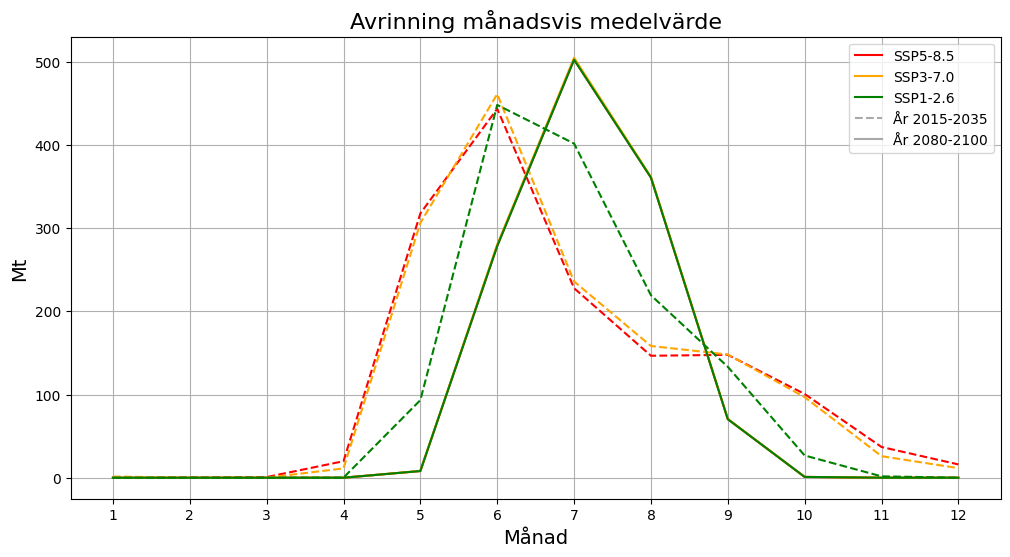

In [23]:
fig, ax = plt.subplots(figsize=(12,6))
x = np.arange(1, 13)

plt.plot(x,runoff_monthly_ssp585, label = "SSP5-8.5", color = "r")
plt.plot(x,runoff_monthly_ssp585_sen,linestyle = "--", color = "r")

plt.plot(x,runoff_monthly_ssp370,label = "SSP3-7.0", color = "orange")
plt.plot(x,runoff_monthly_ssp370_sen,linestyle = "--", color ="orange")

plt.plot(x,runoff_monthly_ssp126, label = "SSP1-2.6", color= "g")
plt.plot(x,runoff_monthly_ssp126_sen,linestyle = "--" ,color= "g")



plt.plot([],[],linestyle = "--", label = "År 2015-2035", color = "darkgray")
plt.plot([],[], label = "År 2080-2100", color = "darkgray")

plt.xticks(x)
plt.legend(); plt.grid(); plt.title("Avrinning månadsvis medelvärde",fontsize=fnsize_title); plt.ylabel("Mt",fontsize=fnsize_label); plt.xlabel("Månad",fontsize=fnsize_label)
plt.savefig("avrinning_månadsvis")
plt.show()

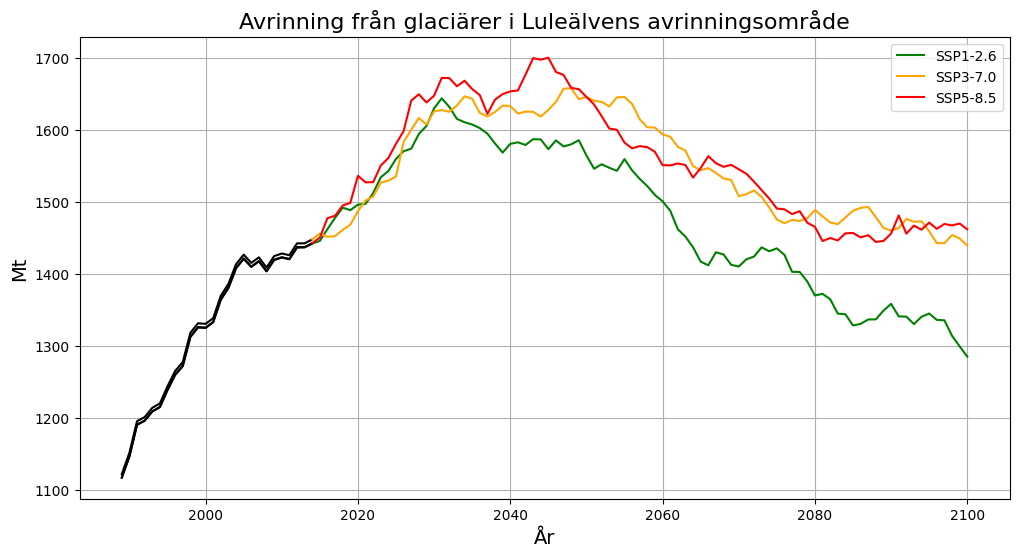

In [25]:
fig, ax = plt.subplots(figsize=(12,6))
split_year = 2014

total_runoff_ssp126.sel(time=slice(None, split_year)).plot(ax=ax, color="k", label=None)
total_runoff_ssp126.sel(time=slice(split_year, None)).plot(ax=ax, color="g", label="SSP1-2.6")

total_runoff_ssp370.sel(time=slice(None, split_year)).plot(ax=ax, color="k", label=None)
total_runoff_ssp370.sel(time=slice(split_year, None)).plot(ax=ax, color="orange", label="SSP3-7.0")

total_runoff_ssp585.sel(time=slice(None, split_year)).plot(ax=ax, color="k", label=None)
total_runoff_ssp585.sel(time=slice(split_year, None)).plot(ax=ax, color="r", label="SSP5-8.5")


plt.title("Avrinning från glaciärer i Luleälvens avrinningsområde",fontsize=fnsize_title); plt.ylabel("Mt",fontsize=fnsize_label); plt.xlabel("År",fontsize=fnsize_label)
plt.legend(); plt.grid()
plt.savefig("total_avrinning_alla_scenarion_alla_members")
plt.show()

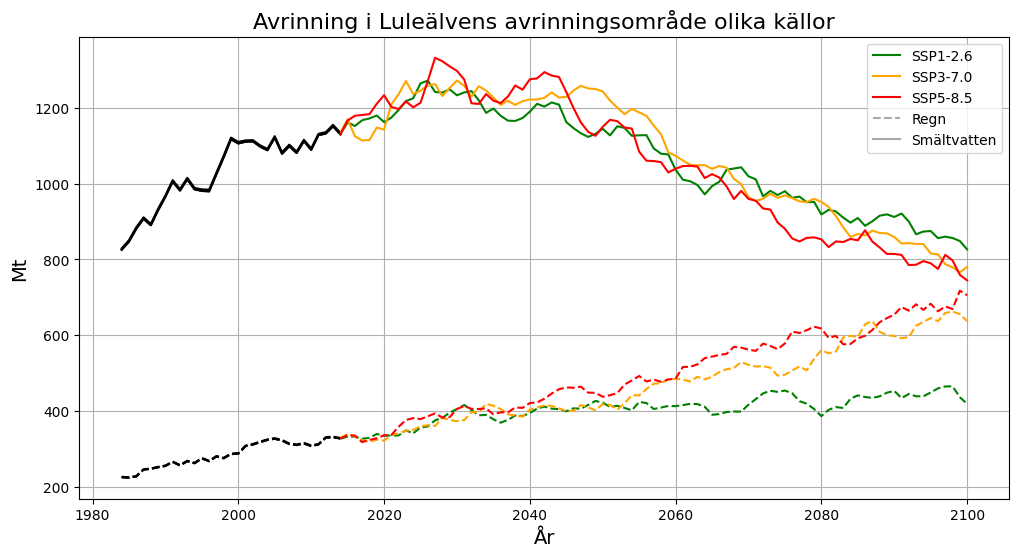

In [22]:
split_year = 2014
fig, ax = plt.subplots(figsize=(12,6))

# SSP1-2.6
runoff_regn_ssp126.sel(time=slice(None, split_year)).plot(ax=ax, color="k", linestyle="--", label=None)
runoff_melt_ssp126.sel(time=slice(None, split_year)).plot(ax=ax, color="k", label=None)
runoff_regn_ssp126.sel(time=slice(split_year, None)).plot(ax=ax, color="g", linestyle="--", label=None)
runoff_melt_ssp126.sel(time=slice(split_year, None)).plot(ax=ax, color="g", label="SSP1-2.6")

# SSP3-7.0
runoff_regn_ssp370.sel(time=slice(None, split_year)).plot(ax=ax, color="k", linestyle="--", label=None)
runoff_melt_ssp370.sel(time=slice(None, split_year)).plot(ax=ax, color="k", label=None)
runoff_regn_ssp370.sel(time=slice(split_year, None)).plot(ax=ax, color="orange", linestyle="--", label=None)
runoff_melt_ssp370.sel(time=slice(split_year, None)).plot(ax=ax, color="orange", label="SSP3-7.0")

# SSP5-8.5
runoff_regn_ssp585.sel(time=slice(None, split_year)).plot(ax=ax, color="k", linestyle="--", label=None)
runoff_melt_ssp585.sel(time=slice(None, split_year)).plot(ax=ax, color="k", label=None)
runoff_regn_ssp585.sel(time=slice(split_year, None)).plot(ax=ax, color="r", linestyle="--", label=None)
runoff_melt_ssp585.sel(time=slice(split_year, None)).plot(ax=ax, color="r", label="SSP5-8.5")

plt.plot([],[],linestyle = "--", label = "Regn", color = "darkgray")
plt.plot([],[], label = "Smältvatten", color = "darkgray")


plt.legend(); plt.grid(); plt.title("Avrinning i Luleälvens avrinningsområde olika källor",fontsize=fnsize_title); plt.ylabel("Mt",fontsize=fnsize_label); plt.xlabel("År",fontsize=fnsize_label)
plt.savefig("Jämförelse regn och smält alla members")
plt.show()

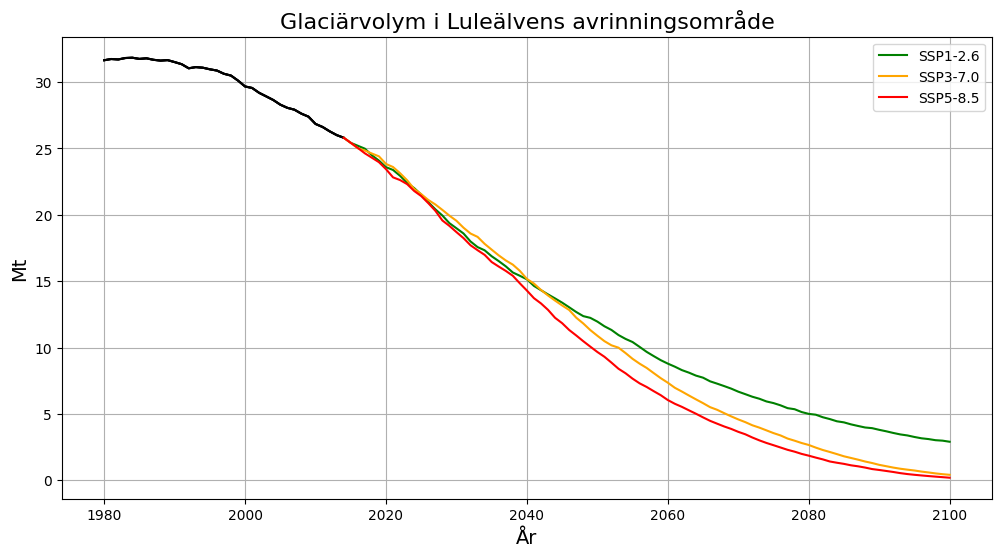

In [27]:
split_year = 2014
fig, ax = plt.subplots(figsize=(12,6))

volume_ssp126.sel(time=slice(None, split_year)).plot(ax=ax, color="k", label=None)
volume_ssp126.sel(time=slice(split_year, None)).plot(ax=ax, color="g", label="SSP1-2.6")

volume_ssp370.sel(time=slice(None, split_year)).plot(ax=ax, color="k", label=None)
volume_ssp370.sel(time=slice(split_year, None)).plot(ax=ax, color="orange", label="SSP3-7.0")

volume_ssp585.sel(time=slice(None, split_year)).plot(ax=ax, color="k", label=None)
volume_ssp585.sel(time=slice(split_year, None)).plot(ax=ax, color="r", label="SSP5-8.5")

plt.legend(); plt.grid(); plt.title("Glaciärvolym i Luleälvens avrinningsområde",fontsize=fnsize_title); plt.ylabel("Mt",fontsize=fnsize_label); plt.xlabel("År",fontsize=fnsize_label)
plt.savefig("volymplot alla members")
plt.show()

/tmp/ipykernel_6707/2854588141.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(); plt.grid(); plt.title("Avrinning månadsvis medelvärde",fontsize=fnsize_title); plt.ylabel("Mt",fontsize=fnsize_label); plt.xlabel("Månad",fontsize=fnsize_label)


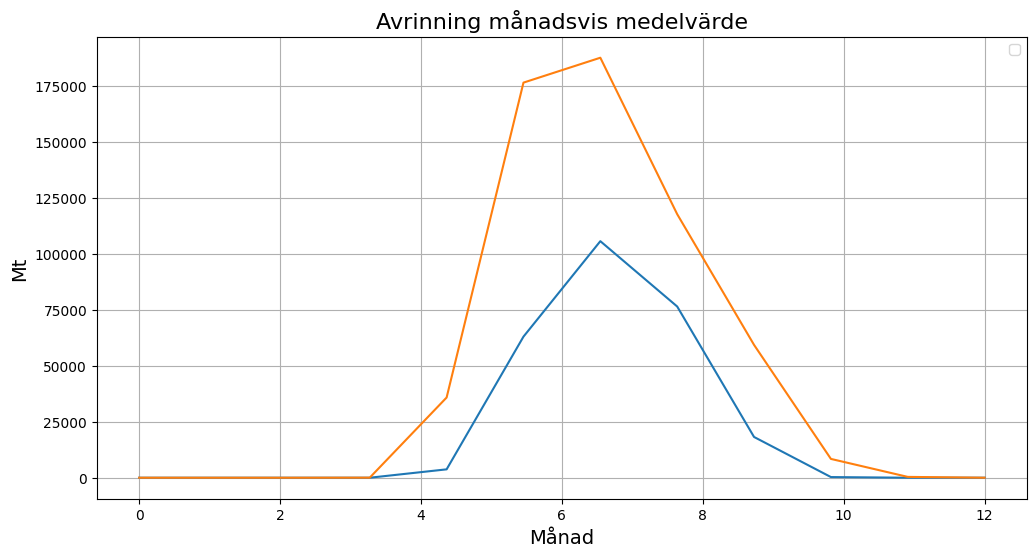